In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

pd.set_option('display.max_columns', None) # display all columns
pd.set_option("max_colwidth", 40) # sets a maximum column width
pd.set_option("display.precision", 7) # sets the number of decimals shown
# pd.set_option("styler.format.precision", 3) # rounds floats

df = pd.read_csv("../data/country-data.csv").set_index("country")
countries = list(df.index)
numerical_features = df.columns

In [57]:
# data = {'Variable' : ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
#        'life_expec', 'total_fer', 'gdpp'],
#  'Label' : ['child mortality', 'exports', 'health', 'imports', 'income', 'inflation',
#        'life expectancy', 'fertility', 'GDPP']}
# pd.DataFrame(data)

## Descriptive statistics

In [58]:
# Calculate descriptive statistics for the variables
stats = df.describe()
ind_list = [1, 2, 3, 7]
stats = stats.iloc[ind_list]
# Round the values in the table to two decimal places
rounded_stats = stats.round(2)
rounded_stats
# print(rounded_stats)
# relative standard deviation
result = rounded_stats.iloc[1].divide(rounded_stats.iloc[0])
# Add the result as an additional row
result = rounded_stats.append(result, ignore_index=True)
result

# rounded_stats.to_latex()
# rounded_stats.to_excel('../out/descriptive_statistics.xlsx')


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,38.2700000,41.1100000,6.8200000,46.8900000,17144.6900000,7.7800000,70.5600000,2.9500000,12964.1600000
1,40.3300000,27.4100000,2.7500000,24.2100000,19278.0700000,10.5700000,8.8900000,1.5100000,18328.7000000
2,2.6000000,0.1100000,1.8100000,0.0700000,609.0000000,-4.2100000,32.1000000,1.1500000,231.0000000
3,208.0000000,200.0000000,17.9000000,174.0000000,125000.0000000,104.0000000,82.8000000,7.4900000,105000.0000000
4,1.0538281,0.6667477,0.4032258,0.5163148,1.1244339,1.3586118,0.1259921,0.5118644,1.4137977


The factor of 1.5 used in the formula for identifying outliers using the interquartile range (IQR) is a common convention, but it is not the only possible value that could be used. Other factors, such as 1.2 or 2, could also be used to define the bounds for the data.

The choice of the factor depends on the specific requirements of the analysis and the data set being used. A smaller factor, such as 1.2, will result in a narrower range of values considered as outliers, while a larger factor, such as 2, will result in a wider range.

It is important to keep in mind that the factor should be chosen based on the characteristics of the data and the purpose of the analysis. For example, if the data set is known to have a large number of extreme values, a larger factor might be more appropriate to identify these values as outliers. On the other hand, if the data set is relatively homogeneous and does not have many extreme values, a smaller factor might be more appropriate.

In [59]:
result = result.append({}, ignore_index=True)
result = result.append({}, ignore_index=True)
result = result.append({}, ignore_index=True)

result.index = ['mean', 'SD', 'min', 'max', 'CV', 'lower bound', 'upper bound', 'outliers']
result

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
mean,38.2700000,41.1100000,6.8200000,46.8900000,17144.6900000,7.7800000,70.5600000,2.9500000,12964.1600000
SD,40.3300000,27.4100000,2.7500000,24.2100000,19278.0700000,10.5700000,8.8900000,1.5100000,18328.7000000
min,2.6000000,0.1100000,1.8100000,0.0700000,609.0000000,-4.2100000,32.1000000,1.1500000,231.0000000
max,208.0000000,200.0000000,17.9000000,174.0000000,125000.0000000,104.0000000,82.8000000,7.4900000,105000.0000000
CV,1.0538281,0.6667477,0.4032258,0.5163148,1.1244339,1.3586118,0.1259921,0.5118644,1.4137977
lower bound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
upper bound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outliers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
indicators = result.columns
print(indicators)
for indicator in indicators:
    # calculate interquartile range
    iqr = result[indicator].describe()["75%"] - result[indicator].describe()["25%"]
    
    # use this value to identify any outliers in the data by using the following formula:
    # Calculate the lower and upper bounds
    lower_b = result[indicator].describe()["25%"] - 1.5 * iqr
    upper_b = result[indicator].describe()["75%"] + 1.5 * iqr
    
    # calculate number of outliers
    upper_outl = df[indicator] > upper_b
    # df_upper_outl  = pd.DataFrame([upper_outl])
    # df_upper_outl = df_upper_outl.transpose()
    # print(indicator,"-> above upper bound: ", df_upper_outl[df_upper_outl[indicator]==True])

    lower_outl = df[indicator] < lower_b
    # df_lower_outl = pd.DataFrame([lower_outl])
    # df_upper_outl = df_lower_outl.transpose()
    # print(indicator,"-> below lower bound: ", df_upper_outl[df_upper_outl[indicator]==True])

       
    outl = sum(lower_outl) + sum(upper_outl)
    
    result.loc[['outliers'],[indicator]] = outl
    result.loc[['lower bound'],[indicator]] = lower_b
    result.loc[['upper bound'],[indicator]] = upper_b
    # result.loc[['lower_bound', 'upper_bound', 'no of outliers'],[indicator]] = lower_b, upper_b, outl
    
  

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


In [61]:
result = round(result,2)

In [62]:
# result.iloc[7].mean()/167*100

In [63]:
result.columns = ['child mortality', 'exports', 'health', 'imports', 'income', 'inflation',
       'life expectancy', 'fertility', 'GDPP']

print(result.to_latex(index=True))


\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  child mortality &  exports &  health &  imports &     income &  inflation &  life expectancy &  fertility &       GDPP \\
\midrule
mean        &            38.27 &    41.11 &    6.82 &    46.89 &   17144.69 &       7.78 &            70.56 &       2.95 &   12964.16 \\
SD          &            40.33 &    27.41 &    2.75 &    24.21 &   19278.07 &      10.57 &             8.89 &       1.51 &   18328.70 \\
min         &             2.60 &     0.11 &    1.81 &     0.07 &     609.00 &      -4.21 &            32.10 &       1.15 &     231.00 \\
max         &           208.00 &   200.00 &   17.90 &   174.00 &  125000.00 &     104.00 &            82.80 &       7.49 &  105000.00 \\
CV          &             1.05 &     0.67 &    0.40 &     0.52 &       1.12 &       1.36 &             0.13 &       0.51 &       1.41 \\
lower bound &           -54.00 &   -60.00 &   -5.70 &   -69.04 &  -27394.60 &     -12.46 &           -83.62 &      -1.55 &  -26915.55 \\
uppe

In [64]:
"ERICH SCHUBERT, JÖRG SANDER, MARTIN ESTER, HANS-PETER KRIEGEL, XIAOWEI XU".lower()

'erich schubert, jörg sander, martin ester, hans-peter kriegel, xiaowei xu'

## Plots

In [65]:
def style_df(df):
    """Style dataframe"""
    cell_hover = {
        'selector': 'td:hover',
        'props': [('background-color', '#ffffb3')]
    }
    row_hover = {
        'selector': 'tr:hover',
        'props': [('background-color', '#ffffb3')]
    }
    
    numeric_columns = df.select_dtypes(include=['int8','int16','int32','int64', 'float16', 'float32', 'float64']).columns
    styler = df.style
    
    styler\
        .set_caption("INSERT CAPTION")\
        .background_gradient(axis="rows", cmap="Blues", subset=['child_mort', 'exports', 'health', 'imports', 'income', 'life_expec', 'total_fer', 'gdpp'])\
        .set_table_styles([cell_hover, row_hover])\
        .format({
            "exports": "{:}%",
            "health": "{:}%",
            "imports": "{:}%",
            })\
        .highlight_max(color="red", subset=numeric_columns)\
        .highlight_min(color="lightgreen", subset=numeric_columns)\
        .bar(subset=["inflation"], align="zero", color=["red", "lightgreen"]) # bar chart
        #.highlight_quantile(q_left=0.25, q_right=0.75, subset="imports", color="red") # highlight quantiles
        #.highlight_between(left=70, right=80, subset="life_expec", color="yellow") # highlight range of values

    return styler

style_df(df.sort_values("child_mort"))

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Iceland,2.6000000,53.4%,9.4%,43.3%,38800,5.4700000,82.0000000,2.2000000,41900
Luxembourg,2.8000000,175.0%,7.77%,142.0%,91700,3.6200000,81.3000000,1.6300000,105000
Singapore,2.8000000,200.0%,3.96%,174.0%,72100,-0.0460000,82.7000000,1.1500000,46600
Finland,3.0000000,38.7%,8.95%,37.4%,39800,0.3510000,80.0000000,1.8700000,46200
Sweden,3.0000000,46.2%,9.63%,40.7%,42900,0.9910000,81.5000000,1.9800000,52100
Slovenia,3.2000000,64.3%,9.41%,62.9%,28700,-0.9870000,79.5000000,1.5700000,23400
Japan,3.2000000,15.0%,9.49%,13.6%,35800,-1.9000000,82.8000000,1.3900000,44500
Norway,3.2000000,39.7%,9.48%,28.5%,62300,5.9500000,81.0000000,1.9500000,87800
Czech Republic,3.4000000,66.0%,7.88%,62.9%,28300,-1.4300000,77.5000000,1.5100000,19800


In [66]:
# generate HTML-file ouput
with open("../out/data_overview.html", "w") as f:
    f.write(style_df(df.sort_values("child_mort")).render())

# Plotting distribution of all features

c:\Users\sutov\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sutov\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sutov\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

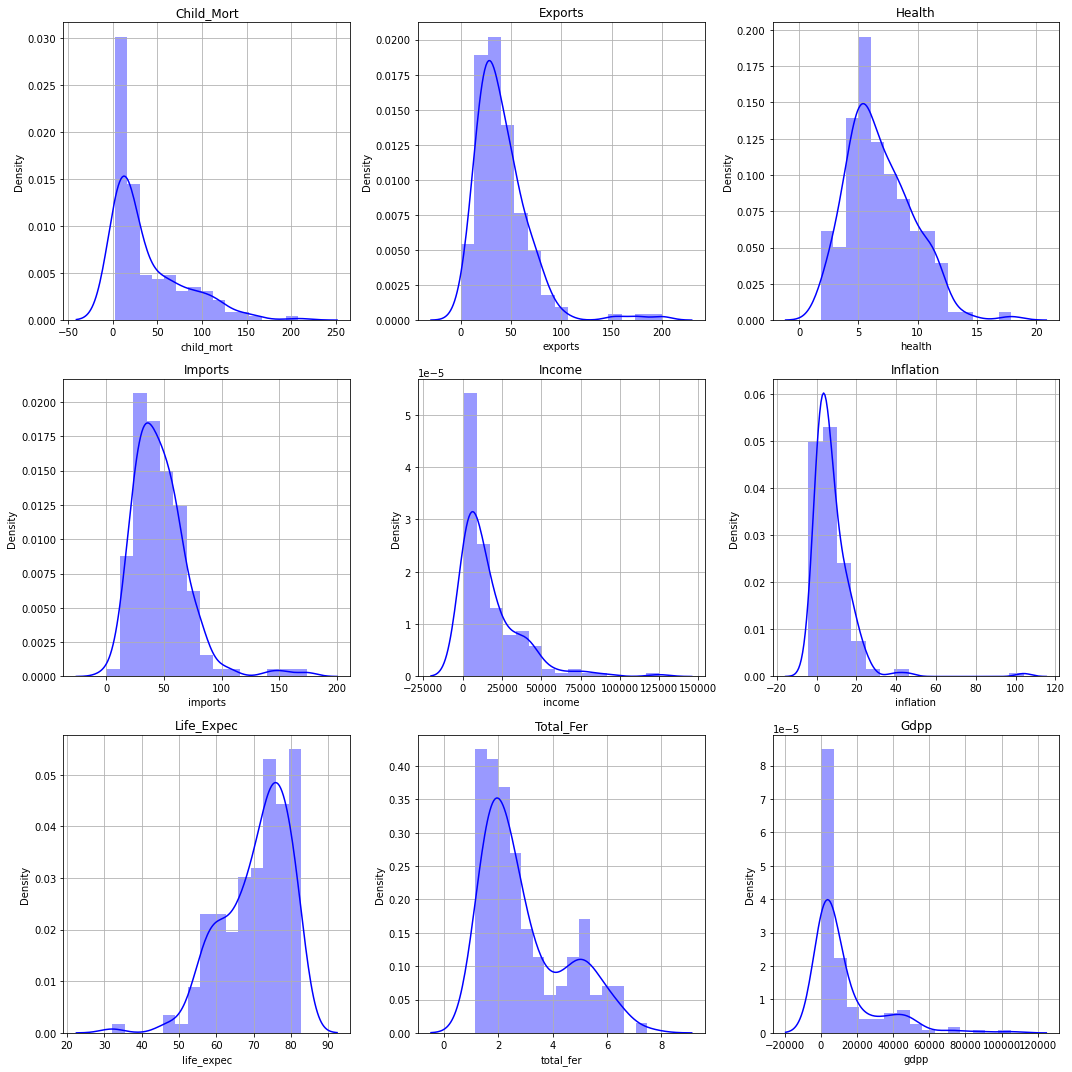

In [67]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i in range(len(numerical_features)):
    plt.subplot(3, 3, i+1)
    #sns.displot(data=df, x=numerical_features[i], kde=True)
    sns.distplot(df[numerical_features[i]], color="blue", bins=15)
    plt.grid()
    plt.title(f"{numerical_features[i].title()}")
plt.savefig("../out/distributions.png", dpi=300)
plt.tight_layout()
plt.show()

We observe that:
- **health** is somewhat normally distributed
- **life expectance** is negatively-skewed (or left-skewed)
- the of the distributions are positively skewed (right-skewed)

## Country ranking for every feature

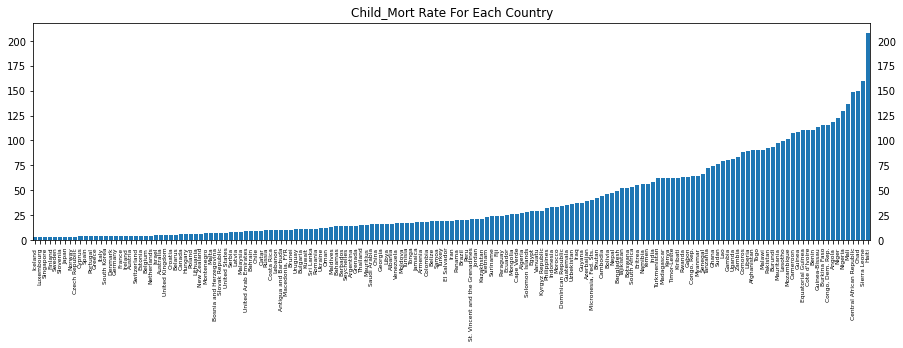

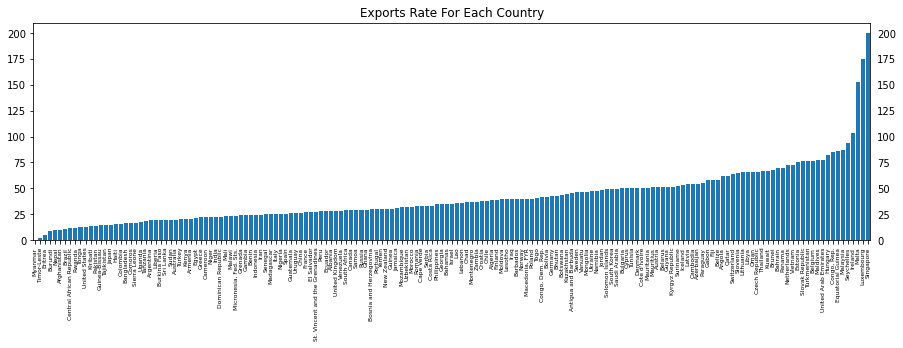

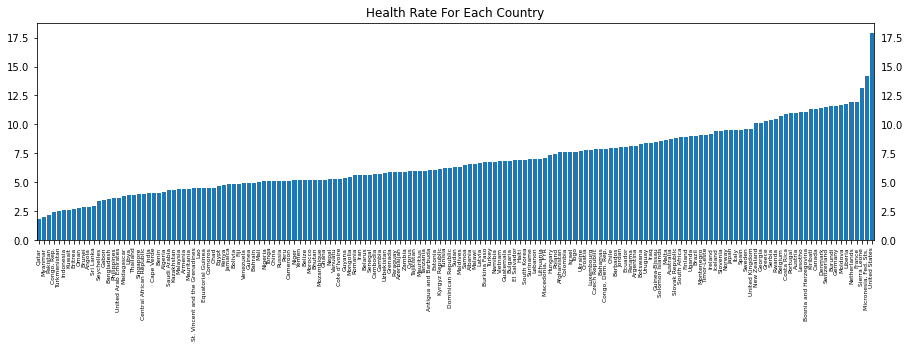

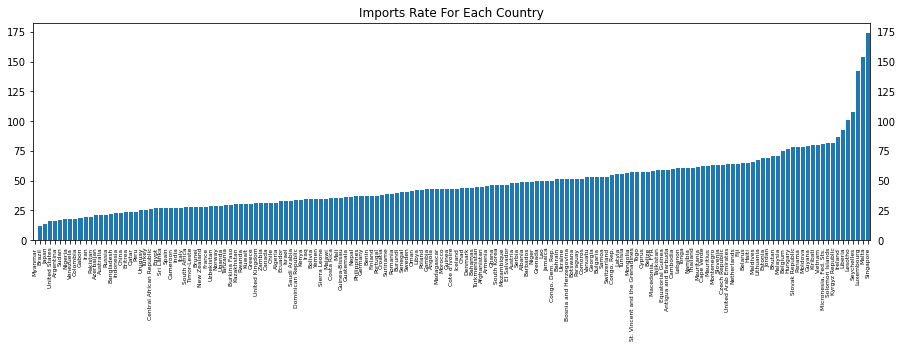

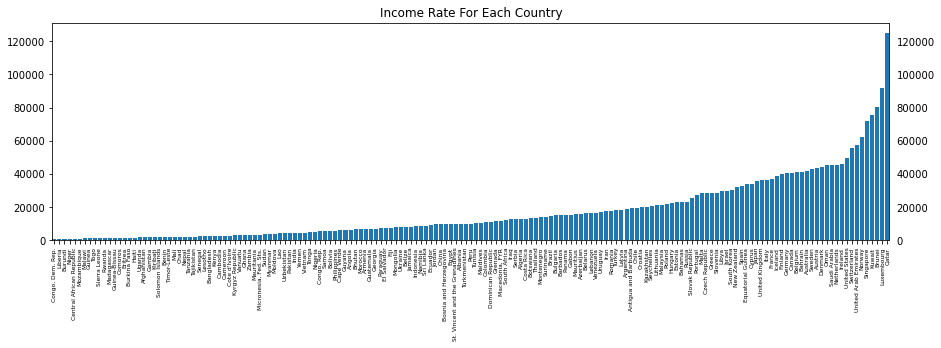

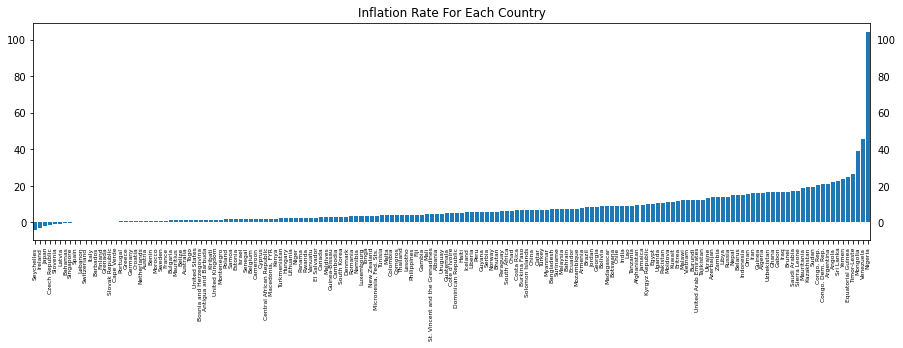

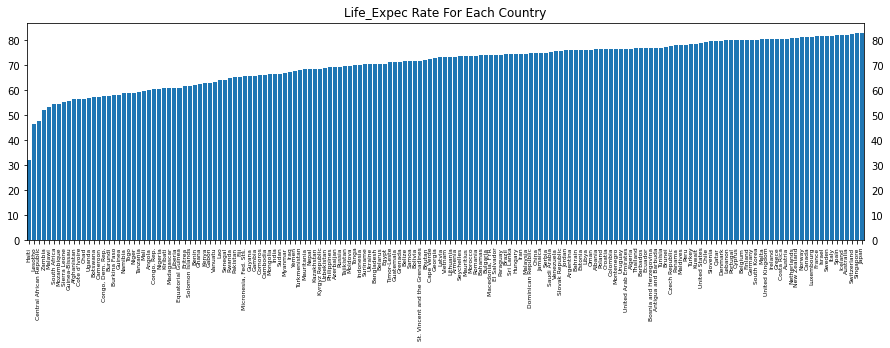

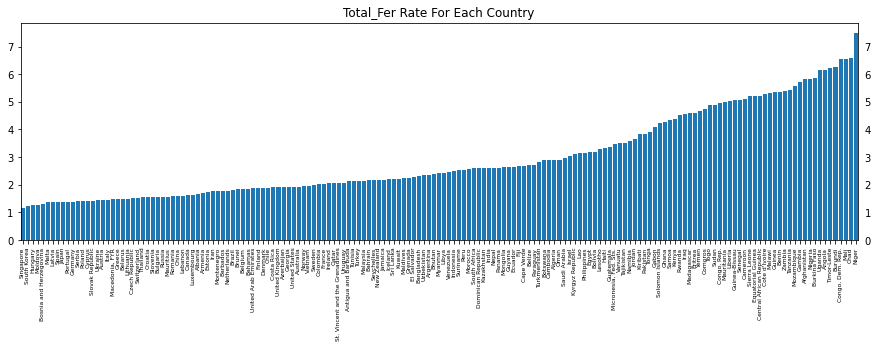

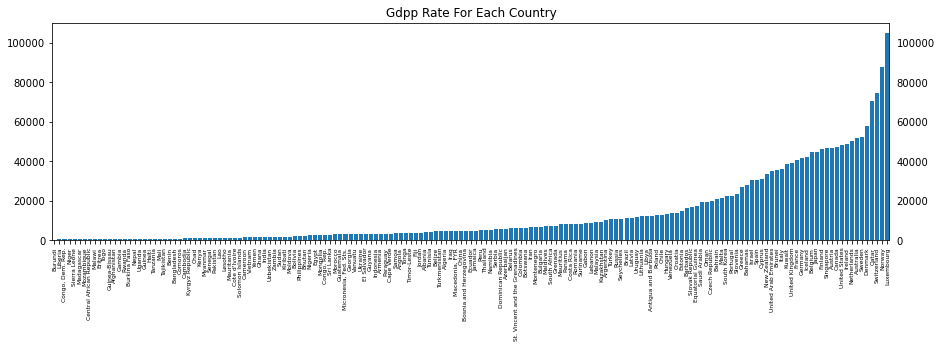

In [68]:
def barplot(feature: str):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 4))
    plt.bar(
        list(df[feature].sort_values().index), 
        df[feature].sort_values()
    )
    plt.xticks(rotation=90, fontsize=6)
    plt.tick_params(labeltop=False, labelright=True)
    plt.margins(x=0, tight=True)
    plt.title(f"{feature.title()} Rate For Each Country")
    plt.savefig(f"../out/feature_barplots/{feature}.png", dpi=400)
    #plt.show()

for feature in df.columns:
    barplot(feature)

# Low and Top feature exploration

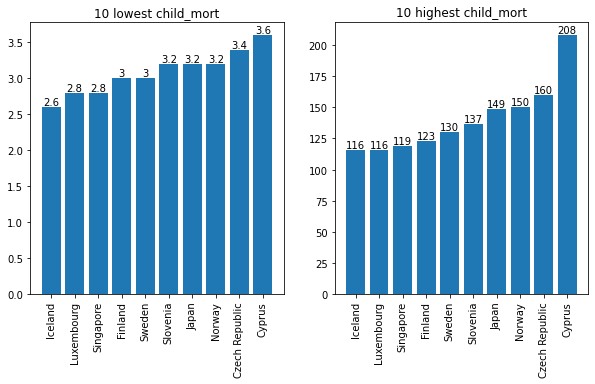

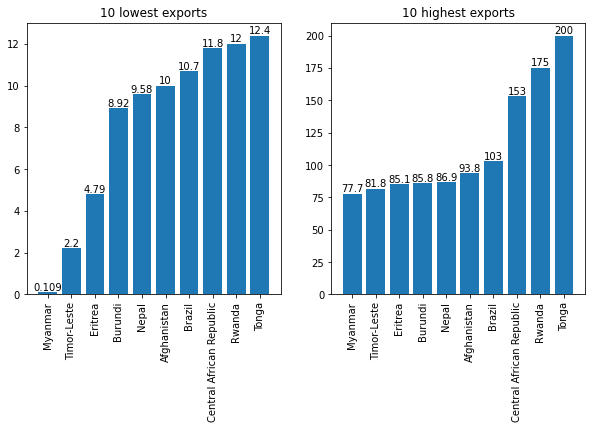

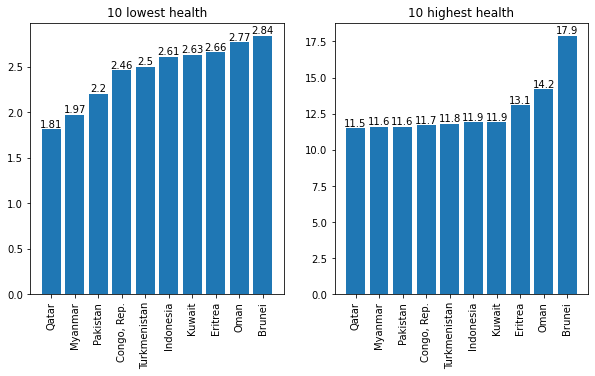

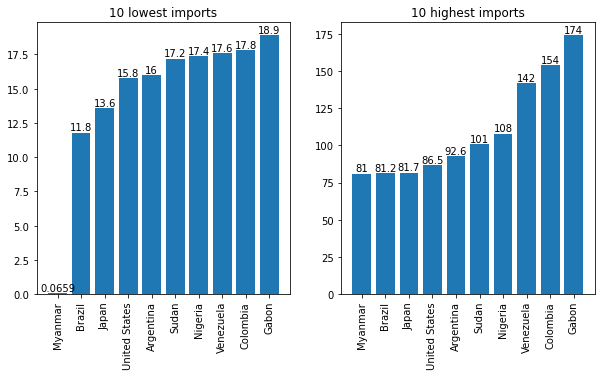

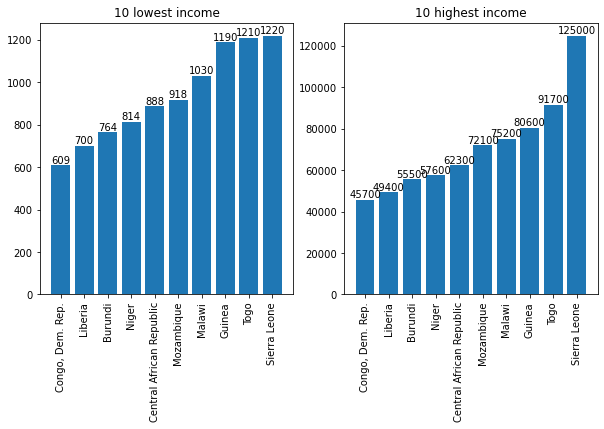

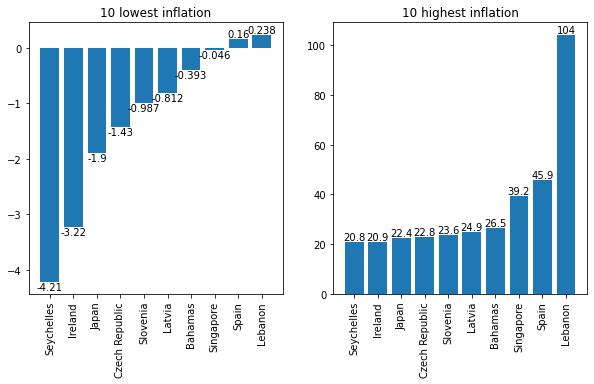

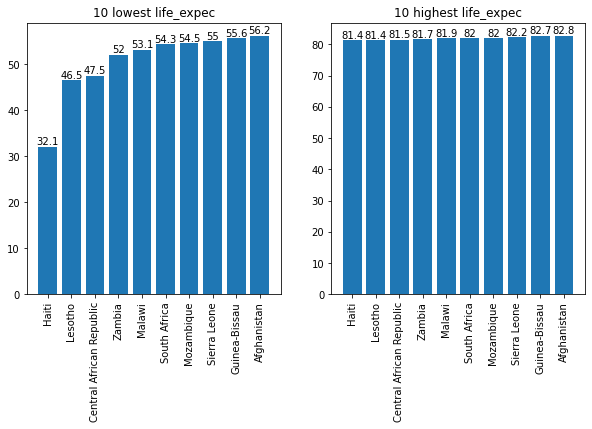

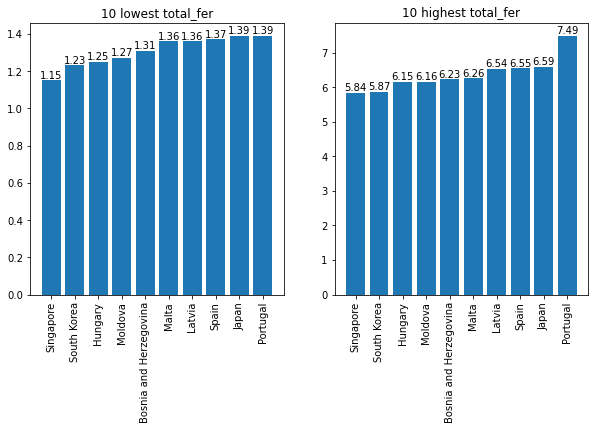

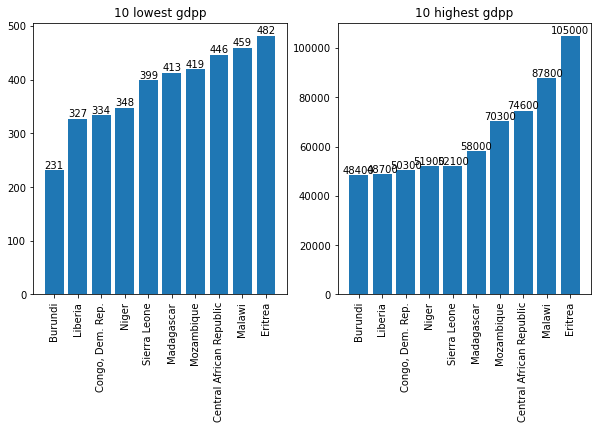

In [69]:
# for each feature, plot the 10 top low and high features in a barplot
for feature in list(numerical_features):
    minimum = df[feature].sort_values(ascending=True).head(10)
    min_indx = list(minimum.index)
    
    maximum = df[feature].sort_values(ascending=True).tail(10)
    max_indx = list(minimum.index)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    min_bars = ax1.bar(x=list(minimum.index), height=minimum)
    ax1.set_title(f"10 lowest {feature}")
    ax1.set_xticks(ticks=min_indx, labels=min_indx, rotation=90)
    ax1.bar_label(min_bars)
    
    max_bars = ax2.bar(x=max_indx, height=maximum)
    ax2.set_title(f"10 highest {feature}")
    ax2.set_xticks(ticks=max_indx, labels=max_indx, rotation=90)
    ax2.bar_label(max_bars)
    
    plt.savefig(f"../out/top_lowest_10_countries/{feature}.png", dpi=300)
    

# Feature Correlation

In [75]:
df.corr

<bound method DataFrame.corr of                      child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   
...                         ...      ...     ...      ...     ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7    2950       2.62   
Venezuela                  17.1     28.5    4.91     17.6   16500      45.90   
Vietnam                    23.3     72.0    6.84     80.2    4490      12.10   
Yemen                      56.3     30.0    5.18     34.4    4480      23.60   
Zambia  

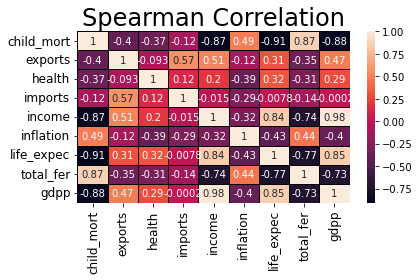

In [70]:
# plot a heatmap for each correlation method

def heatmap(df, title, file_name):
    sns.heatmap(df, annot=True, cmap='rocket', linewidths=0.5, linecolor='black')
    plt.title(title, fontsize=24)
    plt.tick_params(axis='both', which='both', labelsize=12)
    plt.tight_layout()
    plt.savefig(f"../out/correlation_plots/{file_name}", dpi=300)
    

# heatmap(df.corr(method='pearson'), 'Pearson Correlation', 'pearson_heatmap.png')
#heatmap(df.corr(method='kendall'), 'Kendall Correlation', 'kendall_heatmap.png')
heatmap(df.corr(method='spearman'), 'Spearmans Correlation', 'spearman_heatmap.png')

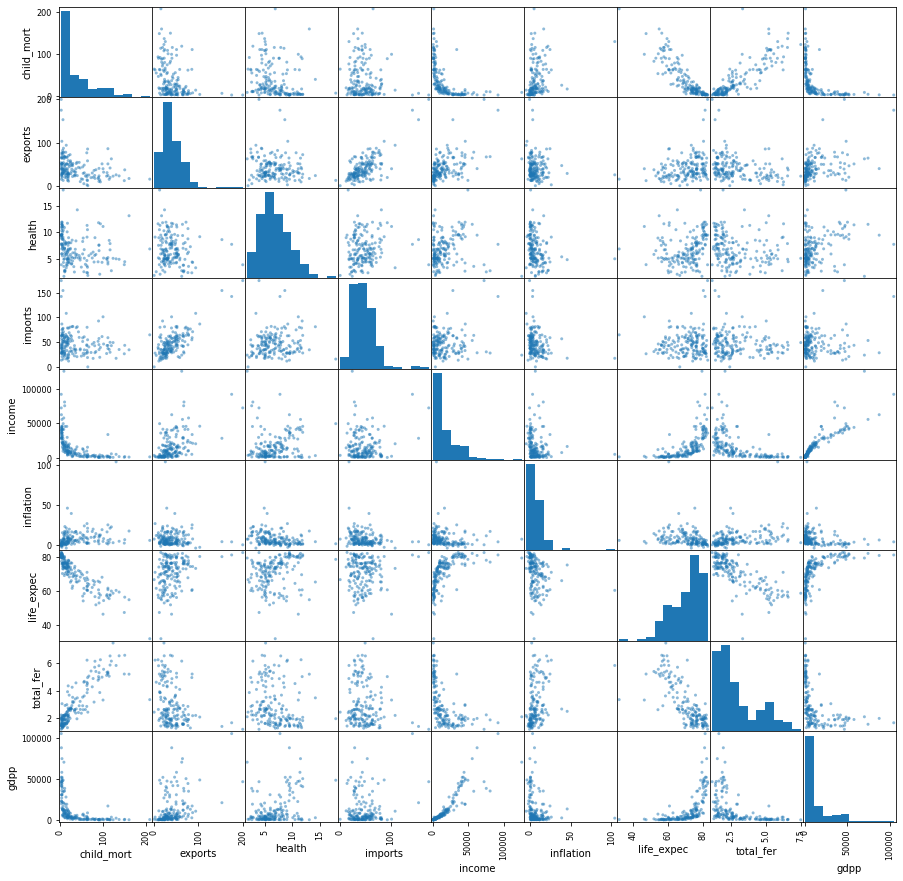

In [71]:
# Plotting correlation matrix
pd.plotting.scatter_matrix(df[numerical_features], diagonal='hist', figsize=(15, 15))
plt.savefig("../out/scatter_matrix.png", dpi=400)
plt.show()

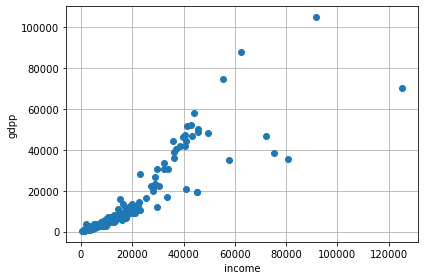

In [72]:
def scatter(df: pd.DataFrame, x: str, y: str):
    plt.rc('axes', axisbelow=True)
    plt.grid()
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    
scatter(df, "income", "gdpp")

In [73]:
# Mutual information score


In [74]:
px.scatter_3d(data_frame=df, 
              x="life_expec", 
              y="health", 
              z="gdpp", 
              color="child_mort",
              hover_data=[df.index]
              )